In [1]:
from constants import *
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
# Set up multiple outputs for cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
im_path = os.path.join(DATA_ORIGINAL_DIR_PATH, 'HAM10000_images_part_1', 'ISIC_0024319.jpg')
im = plt.imread(im_path)

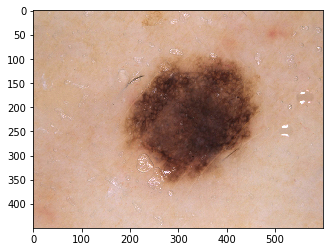

In [4]:
_ = plt.imshow(im)

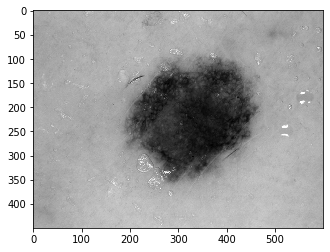

In [5]:
gray_im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
_ = plt.imshow(gray_im, cmap='gray')

In [68]:
gray_im[0, 0]
gray_im[250, 350]

181

38

In [6]:
int(np.percentile(gray_im, 15))

107

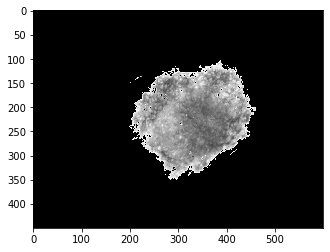

In [7]:
ret, thresh = cv2.threshold(gray_im, 107, 0, cv2.THRESH_TOZERO_INV)
plt.imshow(thresh, cmap='gray')

In [8]:
# thresh[200:210, 350:360]
# gray_im[200:210, 350:360]

np.all(gray_im[200:210, 350:360] == thresh[200:210, 350:360])

True

In [9]:
# mask = np.repeat(np.expand_dims(thresh, axis=-1), 3, axis=2)
new = cv2.bitwise_and(im, im, mask=thresh)

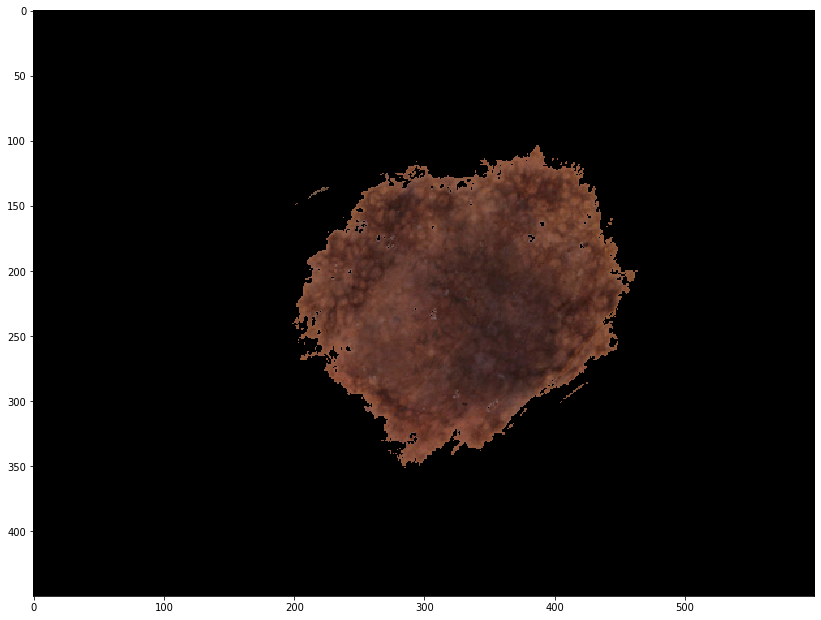

In [11]:
fig = plt.figure(figsize=(14, 14))
ax = plt.subplot(111)
ax.imshow(new)

In [12]:
# im[200:210, 350:360, 0]
# new[200:210, 350:360, 0]

np.all(im[200:210, 350:360] == new[200:210, 350:360])

True

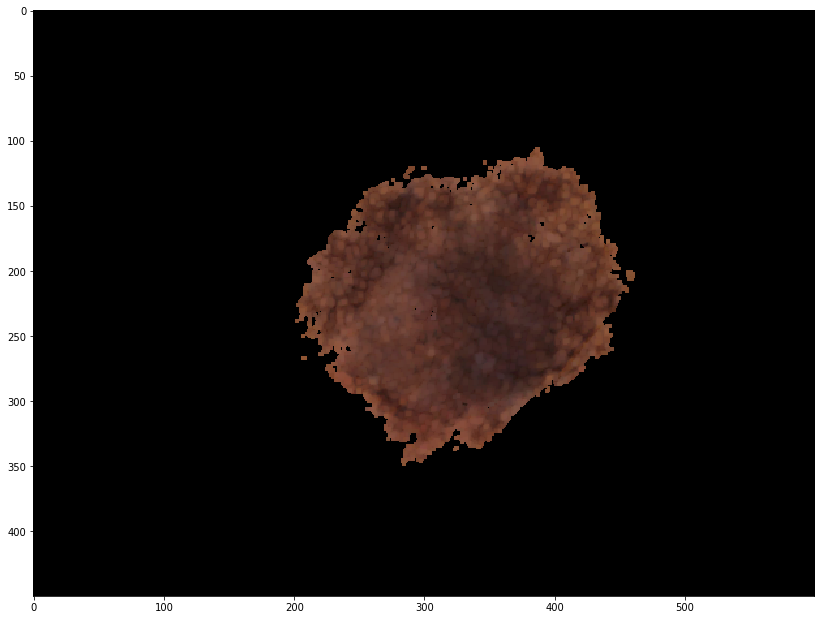

In [21]:
kernel = np.ones((3, 3),np.uint8)
opening = cv2.morphologyEx(new, cv2.MORPH_OPEN, kernel)

fig = plt.figure(figsize=(14, 14))
ax = plt.subplot(111)
ax.imshow(opening)

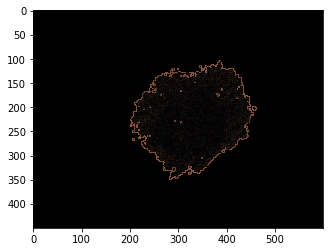

In [24]:
# THERE ARE BETTER WAYS TO CALCULATE GRADIENT (SOBEL OPERATORS OR LAPLACE DERIVATIVES)
# I COULD BLUR THE ORIGINAL IMAGE AND THEN APPLY MORPH_GRADIENT

kernel = np.ones((3, 3),np.uint8)
# gradient = cv2.morphologyEx(new, cv2.MORPH_GRADIENT, kernel)
gradient = cv2.morphologyEx(opening, cv2.MORPH_GRADIENT, kernel)

plt.imshow(gradient)

<Figure size 864x864 with 0 Axes>

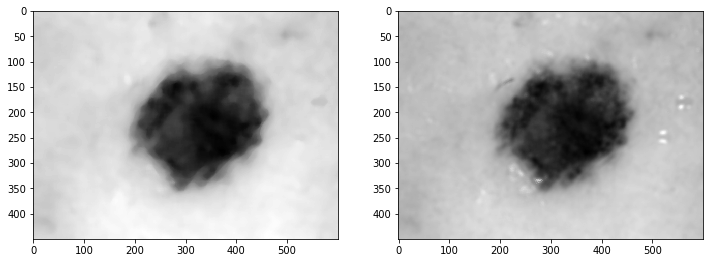

In [57]:
median = cv2.medianBlur(gray_im, 15)
bilateral = cv2.bilateralFilter(gray_im, 10, 100, 100)

plt.figure(figsize=(12, 12))
_ = plt.subplot(1, 2, 1)
_ = plt.imshow(median, cmap='gray')
_ = plt.subplot(1, 2, 2)
_ = plt.imshow(bilateral, cmap='gray')

<Figure size 864x864 with 0 Axes>

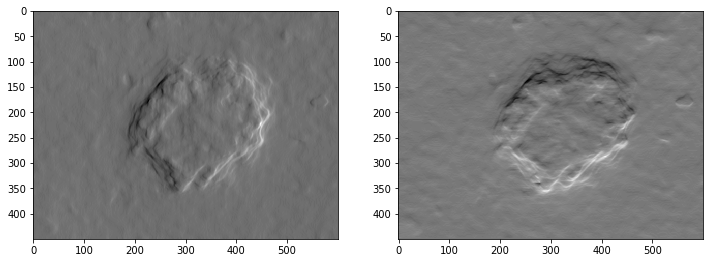

In [63]:
sobel_x = cv2.Sobel(median,cv2.CV_64F, 1, 0,ksize=5)
sobel_y = cv2.Sobel(median, cv2.CV_64F, 0, 1, ksize=5)

plt.figure(figsize=(12, 12))
_ = plt.subplot(1, 2, 1)
_ = plt.imshow(sobel_x, cmap='gray')
_ = plt.subplot(1, 2, 2)
_ = plt.imshow(sobel_y, cmap='gray')


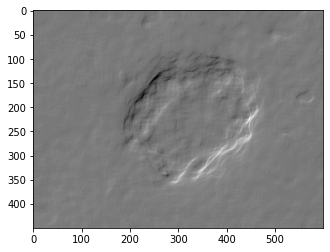

In [64]:
plt.imshow(cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0), cmap='gray')

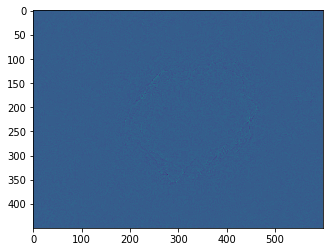

In [66]:
plt.imshow(cv2.Laplacian(median, ddepth=cv2.CV_64F))